# Data Assimilation based on Lorenz '63 model

In [35]:
%load_ext autoreload
%autoreload 2

# Load general python modules
import importlib
import numpy as np
import matplotlib.pyplot as plt

# Load user modules
import lorenz63
import observation 
import ensemble 
import xyzplots


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating the Truth for Data Assimilation

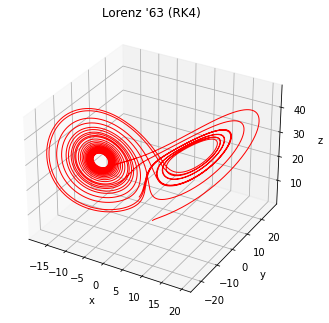

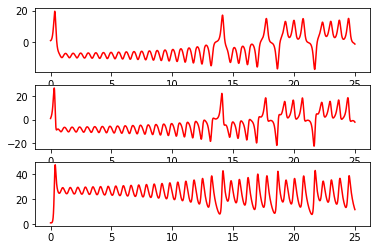

In [36]:
lorenz63_params_model  = { "p" : 10.0, "r" : 28.0, "b" : 8.0/3.0 }
lorenz63_params_num    = { "tmax" : 25.0, "dt" : 1e-3 }
lorenz63_initial_state = [1,1,1]

lorenz63 = lorenz63.lorenz63( **lorenz63_params_model, **lorenz63_params_num )
lorenz63.setInitial( lorenz63_initial_state )
lorenz63.simulate()
lorenz63.plot3D()
lorenz63.plot()


## Observing the True State

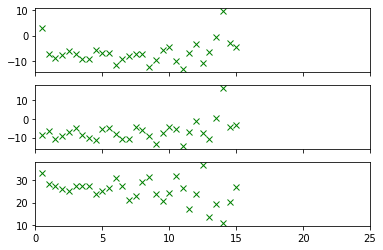

In [37]:
importlib.reload(observation) # For debugging!

obs_params = { "dt" : 0.5, "tmax" : 15.0 }

observation = observation.observation( **obs_params )
observation.observe( lorenz63 )
observation.plot()

## Perturbing the Initial State

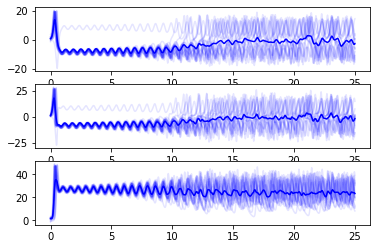

In [38]:
ensemble = ensemble.ensemble(lorenz63,20)
ensemble.simulate()
ensemble.mean()
ensemble.plot()

## Plotting Truth, Observations and Perturbed Models

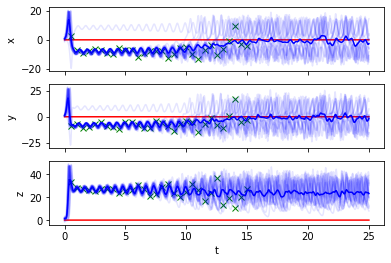

In [39]:
xyzplots = xyzplots.xyzplots(lorenz63,observation,ensemble) 
xyzplots.plot()